<a href="https://colab.research.google.com/github/DS-1090/Indian_Pattern_Classifier/blob/main/IndianFabric_classification_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading Dataset

In [1]:
pip install opendatasets


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/div456/indian-fabrics-3-classes")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: div456
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/div456/indian-fabrics-3-classes


100%|██████████| 88.4M/88.4M [00:05<00:00, 18.1MB/s]


Importing Libraries


In [3]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

Creating Train, Valid, Test Datasets


In [4]:
import pathlib

data_dir = pathlib.Path('/content/indian-fabrics-3-classes/train')

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 1068 files belonging to 3 classes.


In [6]:
data_dir = pathlib.Path('/content/indian-fabrics-3-classes/valid')
valid_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 71 files belonging to 3 classes.


In [7]:
data_dir = pathlib.Path('/content/indian-fabrics-3-classes/test')
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 49 files belonging to 3 classes.


In [8]:
batch_size = 64
img_height = 320
img_width = 320

Create & Train the model

In [9]:
model = Sequential()

In [10]:
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# model.add(layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)))
# model.add(layers.RandomRotation(0.1, fill_mode='nearest'))
# model.add(layers.RandomZoom(0.1))
# model.add(layers.RandomContrast(0.1))
# model.add(layers.RandomBrightness(0.04))

In [11]:

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(BatchNormalization())

model.add(Conv2D(32, 3, padding='same', activation='relu'))

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

# model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


# model.add(Conv2D(32, 3, padding='same', activation='relu'))

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(3, activation='softmax'))


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'],
              run_eagerly=True
               )


In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 320, 320, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 320, 320, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 320, 320, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 160, 160, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 409600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      26,214,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,222,163 (100.03 MB)

 Trainable params: 26,222,163 (100.03 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
type(model)

keras.src.models.sequential.Sequential

In [16]:
h = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=10,
  batch_size= 16
)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 508ms/step - accuracy: 0.3425 - loss: 6.1181 - val_accuracy: 0.5070 - val_loss: 1.0379
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - accuracy: 0.5969 - loss: 0.8992 - val_accuracy: 0.7324 - val_loss: 0.8051
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.8703 - loss: 0.4542 - val_accuracy: 0.7183 - val_loss: 0.7537
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.9583 - loss: 0.1700 - val_accuracy: 0.6901 - val_loss: 0.7689
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.9881 - loss: 0.0821 - val_accuracy: 0.7465 - val_loss: 0.8012
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.9944 - loss: 0.0274 - val_accuracy: 0.7465 - val_loss: 0.7405
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 0.7746 - val_loss: 1.0873
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.9965 - loss: 0.0083 - val_accuracy

In [17]:
h.history

{'accuracy': [0.4016853868961334,
  0.6647940278053284,
  0.882022500038147,
  0.9625468254089355,
  0.9887640476226807,
  0.9962546825408936,
  1.0,
  0.9981273412704468,
  1.0,
  1.0],
 'loss': [4.114221572875977,
  0.8160333633422852,
  0.39542537927627563,
  0.14928284287452698,
  0.06416001170873642,
  0.025555623695254326,
  0.009948845952749252,
  0.006732339039444923,
  0.0031930352561175823,
  0.0024369319435209036],
 'val_accuracy': [0.5070422291755676,
  0.7323943376541138,
  0.7183098793029785,
  0.6901408433914185,
  0.7464788556098938,
  0.7464788556098938,
  0.7746478915214539,
  0.8028169274330139,
  0.7887324094772339,
  0.7887324094772339],
 'val_loss': [1.0379111766815186,
  0.8051376938819885,
  0.7536662817001343,
  0.7689419388771057,
  0.8012498021125793,
  0.7405144572257996,
  1.0873422622680664,
  1.0090079307556152,
  1.1258260011672974,
  1.2216641902923584]}

Text(0.5, 1.0, 'Accuracy vs Epochs')

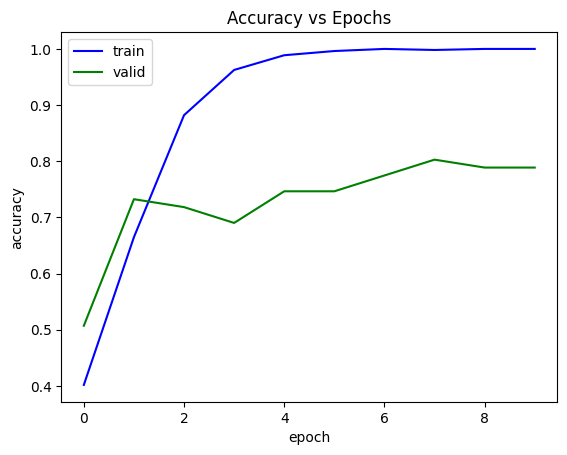

In [18]:
import matplotlib.pyplot as mp

mp.plot(h.history['accuracy'], color='blue')
mp.plot(h.history['val_accuracy'], color='green')
mp.xlabel('epoch')
mp.ylabel('accuracy')
mp.legend(['train', 'valid'])
mp.title('Accuracy vs Epochs')

Text(0.5, 1.0, 'Loss vs Epochs')

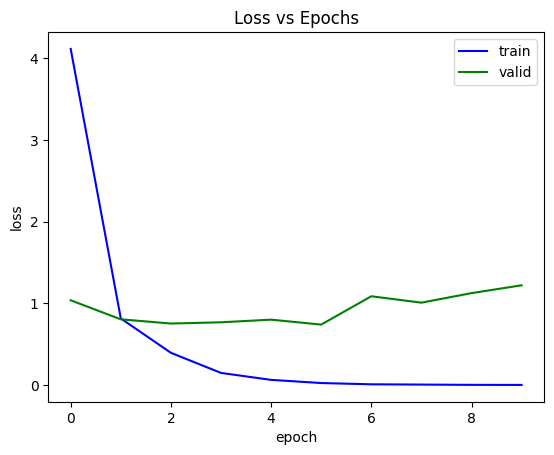

In [19]:
import matplotlib.pyplot as mp

mp.plot(h.history['loss'], color='blue')
mp.plot(h.history['val_loss'], color='green')
mp.xlabel('epoch')
mp.ylabel('loss')
mp.legend(['train', 'valid'])
mp.title('Loss vs Epochs')

Test the Model

In [20]:
loss, accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8163 - loss: 1.1647
Test Accuracy: 0.82
Test Loss: 1.16


In [21]:
import numpy as np

In [22]:
for images, labels in test_ds:
    predictions = model.predict(images)
    for i in range(len(images)):
        image_path = test_ds.file_paths[i]  # Assuming test_ds contains file paths
        index_pred = np.argmax(predictions[i])
        class_names = ['Banarasi', 'Ikat', 'Pichwai']
        predicted_class = class_names[index_pred]
        print("Image Path:", image_path)
        print("Predicted class:", predicted_class)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/images13_jpg.rf.f2a3b1720972de4bb75b7fcb062269c8.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/images33_jpg.rf.b224fd1647ca405f955e199d2b136f2b.jpg
Predicted class: Pichwai
Image Path: /content/indian-fabrics-3-classes/test/Ikat/images33_jpg.rf.9e6ae9d131373c18cdbe6273089867f6.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Pichwai/pastel-hand-painted-pure-moonga-silk-pichwai-blouse-fabric-1-mtr-714991_jpg.rf.11185ddc8f105f1a385559cb725f5cc7.jpg
Predicted class: Pichwai
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/red-traditonal-banarasi-silk-brocade-fabric-2018415488-kfz42azv_jpg.rf.db3ab1c289bebaecbcff8767f5644a8c.jpg
Predicted class: Pichwai
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/FKACJRD10028_2_1200x_jpg.rf.b6a9cf3e00dfa401ad208adce5ffac55.jpg
Predicted class: Pichwai
Image 

In [23]:
from tensorflow.keras.preprocessing import image


In [28]:
img = image.load_img('/content/indian-fabrics-3-classes/test/Ikat/images11_jpg.rf.79b597424656a2fabb74a3b5025f2bee.jpg', target_size=(320, 320))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)
img_array /= 255.0
a= model.predict(img_array)
pred_class_ind = np.argmax(a)
print(a)
print(class_names[pred_class_ind])



(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.24739887 0.60566515 0.14693597]]
Ikat


In [26]:
class_names = test_ds.class_names
print("Class Names:", class_names)


Class Names: ['Banarasi', 'Ikat', 'Pichwai']
